<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales (antes KNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de drogadas que debería tomar un pasiente según su historial clínico<br>

v2.0

### Objetivos:
*   Preprocesar los datos (descarga, lectura, limplieza y filtrado).
*   Conocer la estructura e implementación de las redes neuronales para clasificación múltiple para clasificación de frutas.
*   Comparar resultados del algoritmo de clasificación KNN y Redes Neuronales para el dataset de frutas.

In [119]:
#Librerias a implementar
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
from keras.utils import to_categorical
import keras
from keras.models import Sequential
#from keras.utils import to_categorical

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

### Código de descarga del dataset

In [120]:
if os.access('frutas.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/frutas.csv > frutas.csv
    else:
        !wget frutas.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/frutas.csv

### `fruta.csv`:
El dataset **`fruta.csv`** contiene diferentes tipos de frutas las cuales podremos clasificar en tres categorías según su peso y tamaño. Este dataset se creó a partir de:<br> [Dataset source](https://www.kaggle.com/datasets/mjamilmoughal/fruits-with-colors-dataset)

- **peso** --> peso en gramos
- **ancho** --> ancho en cm
- **alto** --> alto en cm

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [121]:
# Una vez descargado el archivo en Colab.
# Leerlo con Pandas y el método read_csv
# Una vez extraida toda la información se almacena en df
# A partir de df y el método describe(), mostrará la descripción estadistica básica del archivo que se guardará en des
# Crear una fila nueva llamada Nan en el DataFrame  des,
# que indica la cantidad de datos tipo Nan que tiene cada columna.
# Para crear una nueva fila, se utilizará el operador loc, donde se indica el nombre
# de la nueva fila y con que valores se completará.
# La información será de los datos faltantes df.isna().sum()
# Crear una fila nueva llamada %Nan en el DataFrame des,
# Esta fila se completará con los porcentajes de Nan encontrados en cada columna.

df = pd.read_csv("frutas.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,peso,ancho,alto
count,55.000000,55.000000,55.000000
mean,133.800000,6.738182,6.818182
std,42.591688,0.747710,1.912541
min,71.000000,5.500000,3.500000
25%,86.000000,6.000000,4.750000
50%,150.000000,6.900000,7.200000
75%,167.000000,7.350000,7.950000
max,216.000000,8.400000,10.500000
Nan,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000


In [122]:
# Muestra las 5 primeras filas del DataFrame df
df.head()

,peso,ancho,alto,tipo,fruta
0,192,8.4,7.3,granny_smith,manzana
1,180,8.0,6.8,granny_smith,manzana
2,176,7.4,7.2,granny_smith,manzana
3,86,6.2,4.7,mandarin,mandarina
4,84,6.0,4.6,mandarin,mandarina


In [123]:
# Cantidad de filas y columnas con shape
# En la ubicación 0 corresponde a las filas
print('Cantidad de datos en observacion:', df.shape[0])

Cantidad de datos en observacion: 55


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [124]:
# Descripción estadistica básica del DataFrame df
df.describe()

,peso,ancho,alto
count,55.000000,55.000000,55.000000
mean,133.800000,6.738182,6.818182
std,42.591688,0.747710,1.912541
min,71.000000,5.500000,3.500000
25%,86.000000,6.000000,4.750000
50%,150.000000,6.900000,7.200000
75%,167.000000,7.350000,7.950000
max,216.000000,8.400000,10.500000


In [125]:
# Se accede a la columna "fruta" para contar la frecuencia de los valores únicos (Cuenta la cantidad de frutas distintas que Hay en el dataset).
# como está repartida las categorias entre las frutas
df['fruta'].value_counts()

mandarina    20
manzana      19
limon        16
Name: fruta, dtype: int64

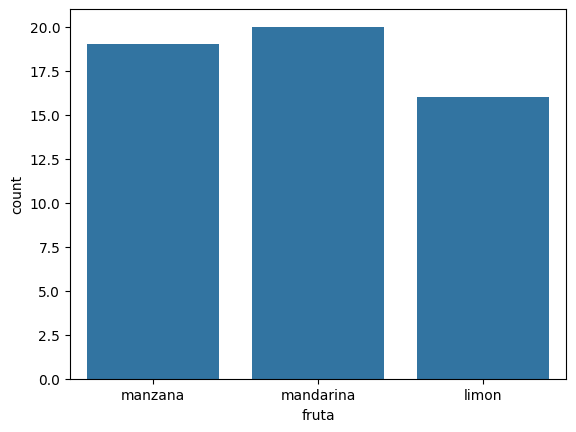

In [126]:
# Se representa graficamente la frecuencia de las frutas
# Esto permite explorar que tan balanceado está el dataset.
# sns, alias de Seaborn
# countplot(), gráfico de barras
# Necesita toda la data
# Se especifica la columna a representar, en este caso "fruta"
sns.countplot(data=df, x="fruta")

# Muestra el gráfico
plt.show()

Se puede ver que el dataset está bastante balanceado, no habrá una tendencia marcada

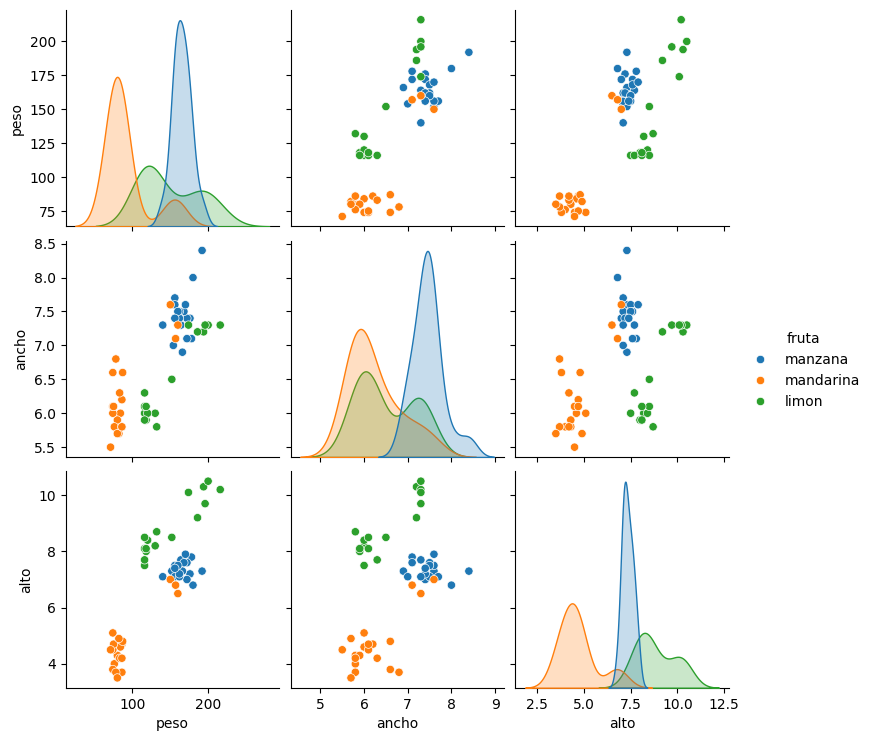

In [127]:
# Gráfico que muestra los datos discriminados por la columna "fruta"
sns.pairplot(df, hue= 'fruta')
plt.show()

In [128]:
# Nos quedamos con aquellas columnas que podemos entender su relacion con el objetivo:
# 'peso', 'ancho', 'alto', 'fruta'
# Para acceder a las columnas mencionadas se accede al DataFrame df[] y como
# son varias columnas se indican los nombres en una lista
# Almacenandose en el DataFrame df_clean
df_clean = df[['peso', 'ancho', 'alto', 'fruta']]
df_clean.head(10)

,peso,ancho,alto,fruta
0,192,8.4,7.3,manzana
1,180,8.0,6.8,manzana
2,176,7.4,7.2,manzana
3,86,6.2,4.7,mandarina
4,84,6.0,4.6,mandarina
5,80,5.8,4.3,mandarina
6,80,5.9,4.3,mandarina
7,76,5.8,4.0,mandarina
8,178,7.1,7.8,manzana
9,172,7.4,7.0,manzana


#### Normalización de los datos

Analizar cual es la distribución de los datos numéricos
- peso
- ancho
- alto

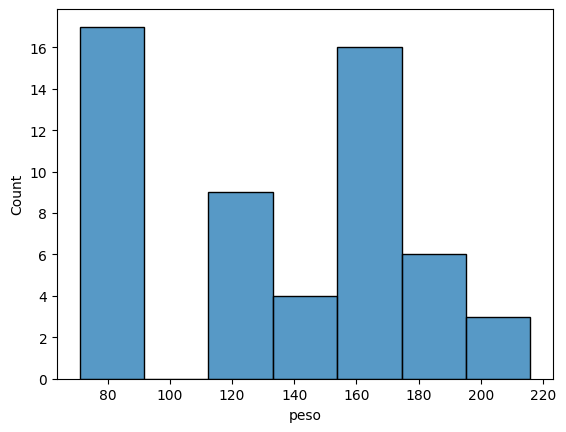

In [129]:
# Se representa graficamente la distribución de los pesos de las frutas
# sns, alias de Seaborn
# displot(), gráfico de distribución
# Necesita toda la data
# Se especifica la columna a representar, en este caso "peso"
sns.histplot(data=df_clean, x='peso')
# Muestra el gráfico
plt.show()

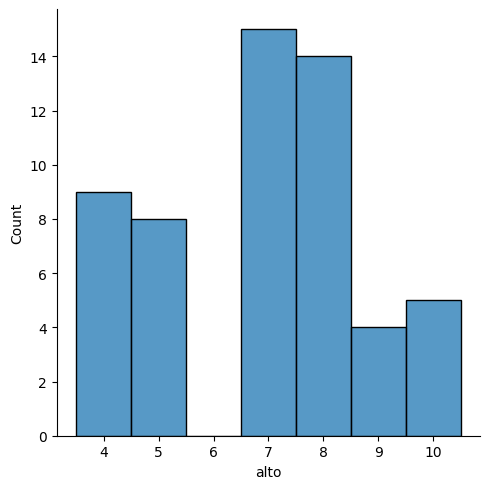

In [130]:
# Se representa graficamente la distribución de los altos de las frutas
# sns, alias de Seaborn
# displot(), gráfico de distribución
# Necesita toda la data
# Se especifica la columna a representar, en este caso "alto"
sns.displot(data=df_clean, x='alto')
# Muestra el gráfico
plt.show()

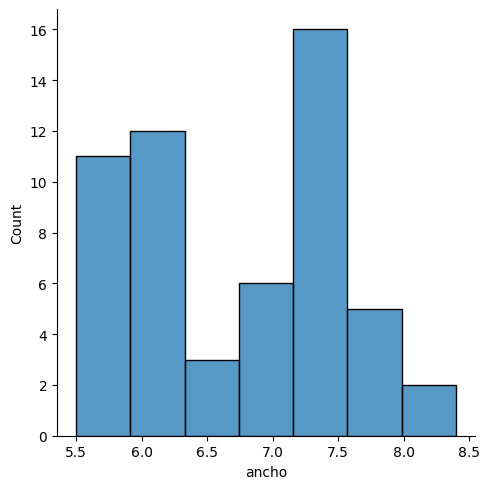

In [131]:
# Se representa graficamente la distribución de los anchos de las frutas
# sns, alias de Seaborn
# displot(), gráfico de distribución
# Necesita toda la data
# Se especifica la columna a representar, en este caso "ancho"
sns.displot(data=df_clean, x='ancho')

# Muestra el gráfico
plt.show()

Se normalizarán los datos de las columnas; peso, ancho y alto, a través del StandardScaler, ya que el rango de datos de cada columna es diferente.

In [132]:
# Normalización de datos
# Se importa la herramienta de sklearn.preprocessing como StandardScaler
from sklearn.preprocessing import StandardScaler

# Se crea una copia del DataFrame df_clean a df_norm
df_norm = df_clean.copy()

# Se crean los objetos; peso_scaler, ancho_scaler y alto_scaler a partir de la clase StandardScaler()
peso_scaler = StandardScaler()
ancho_scaler = StandardScaler()
alto_scaler = StandardScaler()

# Del DataFrame normalizado df_norm se emplea el método .loc para editar los datos de las columnas: peso, ancho e alto
# Cada columna se completará con los datos normalizados
# Para ello, se utiliza cada objeto creado y accede al método .fit_transform()
# se indica la columna del DataFrame a normalizar
# Al agregar .values, solo toma los valores, sin nombres de funciones (Los nombres de las columnas).
df_norm.loc[:, 'peso'] = peso_scaler.fit_transform(df[['peso']].values)
df_norm.loc[:, 'ancho'] = ancho_scaler.fit_transform(df[['ancho']].values)
df_norm.loc[:, 'alto'] = alto_scaler.fit_transform(df[['alto']].values)
df_norm.head()

,peso,ancho,alto,fruta
0,1.379058,2.243028,0.254248,manzana
1,1.094716,1.703130,-0.009594,manzana
2,0.999936,0.893284,0.201479,manzana
3,-1.132629,-0.726407,-1.117730,mandarina
4,-1.180019,-0.996356,-1.170499,mandarina


In [133]:
# Se importa la herramienta LabelEncoder de la librería sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Se crea el objeto le a partir de la clase Label Encoding
le = LabelEncoder()

# Se hace una copia de df_norm a df_enc
df_enc = df_norm.copy()

# Reemplazar la columna de salida de texto a números
df_enc['fruta'] = le.fit_transform(df_enc['fruta'])

# Observar las primeras 5 filas
df_enc.head()

,peso,ancho,alto,fruta
0,1.379058,2.243028,0.254248,2
1,1.094716,1.703130,-0.009594,2
2,0.999936,0.893284,0.201479,2
3,-1.132629,-0.726407,-1.117730,1
4,-1.180019,-0.996356,-1.170499,1


In [134]:
# Clases identificadas
le.classes_

array(['limon', 'mandarina', 'manzana'], dtype=object)

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [135]:
# Obtener los valores de X e y
# En X se almacenarán todos los valores de las columnas (con .values), excepto los valores de la columna "fruta",
# la cuál se elimina con el método .drop()
# Necesita el nombre de la columna y
# axis=1 para que se elimine por filas.
X = df_enc.drop('fruta', axis=1).values

# En y, sólo se almacena los valores de la columna "target", que será la columna objetivo.
# Importante, se implementa to_categorical para obterner la información en un array de matrices, donde cada matriz contiene 3 valores,
# los tres valores de las categorias y que también representen las mismas cantidad de filas, es similar al onehotencoder.
# Necesita indicar la columna "fruta" del DataFrame df_enc usando corchetes.
# se implementa el método values para obtener solo los valores y que no vengan incluidos los nombres de las columnas.
y = to_categorical(df_enc['fruta'])


In [136]:
df_enc.head()

,peso,ancho,alto,fruta
0,1.379058,2.243028,0.254248,2
1,1.094716,1.703130,-0.009594,2
2,0.999936,0.893284,0.201479,2
3,-1.132629,-0.726407,-1.117730,1
4,-1.180019,-0.996356,-1.170499,1


In [137]:
X.shape[1]

3

In [138]:
# Entrada a la red neuronal
# El [1] indica que solo toma en cuenta el número de columnas
in_shape = X.shape[1]
in_shape

3

In [139]:
y.shape[1]

3

In [140]:
# Salida a la red neuronal
# Que puede tener cualquier valor de la categoría 0,1,2 (manzana, mandarina, limón)
out_shape = y.shape[1]
out_shape

3

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [141]:
# Se importa la herramienta de sklearn.model_selectionl como train_test_split
from sklearn.model_selection import train_test_split

# Fijamos un "random_state" constante para que siempre el dataset se parta de la misma forma
# para poder repetir los ensayos
# Ojo! Los dataset de train y test son array numpy
# Se importa la herramienta de la libreria  train_test_split()
# Necesita los valores de X e y
# test_size=0.2, permite indicar el porcentaje de valores para validar, equivalente a un 20%
# random_state=42,  es un número fijo que utilizan comunmente en documentación, significa que para cada ejecución del algoritmo
#se genere nuevos valores aleatorios
# y los conjuntos de datos de entrenamiento y pruebas serán diferentes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [142]:
# Se importa Dense de la librería tensorflow.keras.layers
from keras.layers import Dense

def create_model(hidden_neurons):
    '''Función que recibe hidden_neurons (cantidad de neuronas). Esta
    función tiene el objetivo crea un modelo con redes neuronales para
    clasificación múltiple'''

    # Se crea el objeto model2 a partir de la clase Sequential()
    model = Sequential()

    # Crear la capa de entrada y la capa oculta (hidden) de la red, que tendrá:
    # --> tantas entradas (input_shape) como columnas (in_shape)
    # --> tantas neuronas como deseemos
    # --> utilizamos "sigmoid" como capa de activación
    model.add(Dense(units=hidden_neurons, activation='sigmoid', input_shape=(in_shape,)))

    # Crear la capa de salida, que tendrá tantas neuronas como salidas posibles
    # Se implementa 'sigmoid' ya que la salida es multiple
    model.add(Dense(units=out_shape, activation='softmax'))

    return model

In [143]:
# Se invoca a la función que se encarga de crear el modelos con los valores pasados.
model = create_model(16)

# Configuración del modelo para el entrenamiento, implementando el método compile a partir del modelo creado.
# Se necesita indicar los parámetros:
# optimizer, nombre del optimizador (es el algoritmo que se encarga del descenso de gradiente estocástico)
# Fuente: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
# loss, se llama función de pérdida, representa las categorías conocidas de las predicción. Al ser 'categorical_crossentropy'
#la predicción tiene una salida con varias opciones.
# metrics, se define la métrica que evaluará el modelo durante el entrenamiento y las pruebas.
# learning_rate, tasa de aprendizaje. El valor predeterminado es 0,001.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Se entrena el modelo con el método fit
# Necesita definir los valores para X_train, y_train sumado a la cantidad de épocas que seria la iteraciones de entrenamiento y el porcentaje
# dirigido a validación (validation_split=0.2)
# batch_size, tamaño del lote a entrenar.
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=50, batch_size=32)


Epoch 1/50
2/2 [==============================] - 1s 172ms/step - loss: 1.4325 - accuracy: 0.2857 - val_loss: 1.6420 - val_accuracy: 0.2222
Epoch 2/50
2/2 [==============================] - 0s 29ms/step - loss: 1.3848 - accuracy: 0.2857 - val_loss: 1.5872 - val_accuracy: 0.2222
Epoch 3/50
2/2 [==============================] - 0s 28ms/step - loss: 1.3454 - accuracy: 0.2857 - val_loss: 1.5247 - val_accuracy: 0.2222
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 1.3050 - accuracy: 0.2857 - val_loss: 1.4709 - val_accuracy: 0.2222
Epoch 5/50
2/2 [==============================] - 0s 28ms/step - loss: 1.2624 - accuracy: 0.3429 - val_loss: 1.4222 - val_accuracy: 0.3333
Epoch 6/50
2/2 [==============================] - 0s 29ms/step - loss: 1.2277 - accuracy: 0.3714 - val_loss: 1.3685 - val_accuracy: 0.4444
Epoch 7/50
2/2 [==============================] - 0s 28ms/step - loss: 1.1937 - accuracy: 0.4000 - val_loss: 1.3160 - val_accuracy: 0.4444
Epoch 8/50
2/2 [==========

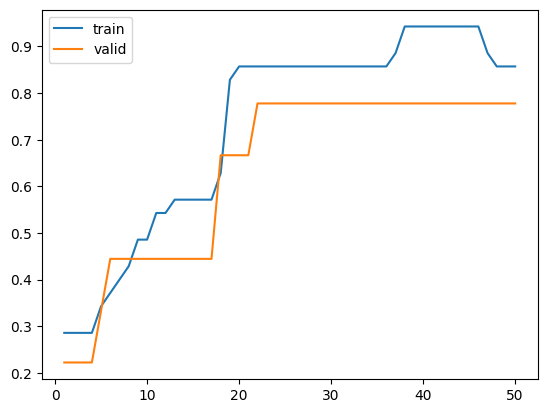

In [144]:
# Variable epocas_conteo, que almacena en una lista la cantidad de épocas de train
# history, es la variable que almacena las predicciones del modelo
# y de ella se puede acceder a información como su historial (history) del accuracy
epocas_conteo= range(1, len(history.history['accuracy']) + 1)

# De Seaborn (sns) se accede al gráfico de línea para representar;
# Por un lado, el 'accuracy',
# Por el otro, la validación (val_accuracy)
sns.lineplot(x=epocas_conteo,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epocas_conteo,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [145]:
# Variable y_hat_prob que almacena las probabilidades de las predicciones
# con los datos de evaluación
y_hat_prob = model.predict(X_test)

# y_hat almacena los índices de los valores (probabilidades) máximos a lo largo de un eje.
y_hat = np.argmax(y_hat_prob,axis=1)
y_hat

1/1 [==============================] - 0s 40ms/step


array([0, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2])

In [146]:
# De model creado se puede acceder al sumario que muestra la estructura del modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                64        
                                                                 
 dense_7 (Dense)             (None, 3)                 51        
                                                                 
Total params: 115 (460.00 Byte)
Trainable params: 115 (460.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [147]:
# Calcular la exactitud (accuracy)
#scores = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test)
scores[1]

1/1 [==============================] - 0s 28ms/step - loss: 0.6889 - accuracy: 0.8182


0.8181818127632141

In [148]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test.argmax(axis=1), y_hat, normalize=True)

0.8181818181818182

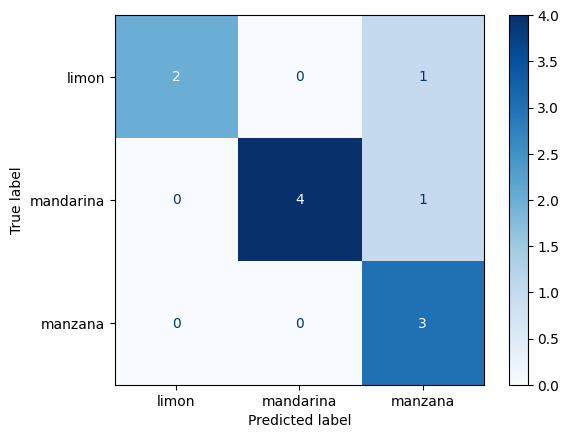

In [149]:
# Se utiliza la matriz de confusión para evaluar la precisión de una clasificación.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Necesita dos variables que contengan los valores a comparar
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)

# Código para realizar la representación gráfica con los resultados
# Se crea la varible cmd, que almacena visualization de la Confusion Matrix
# Necesita la variable cm que contiene los resultados de la comparación entre los valores reales y predicción
# display_labels, se especifica las etiquetas de las categorias que se evalúan.
cmd = ConfusionMatrixDisplay(cm, display_labels=le.classes_)

# Con cmd.plot se especifica el mapa de colores reconocido por matplotlib.
cmd.plot(cmap=plt.cm.Blues)

# Mostrar la figura
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [150]:
# Supongamos que deseamos ver a que categoría que
# pertenece una fruta con las siguientes características
peso = 130
ancho = 15
alto = 12

In [151]:
# El scaler espera como entrada una matriz (filas y columnas)
# Por eso el doble corchete
peso_numpy = np.array([[peso]])

# Utilizamos float para convertir la matriz que retorna el scaler
# a un número
peseo_norm = float(peso_scaler.transform(peso_numpy))
ancho_norm = float(ancho_scaler.transform(np.array([[ancho]])))
alto_norm = float(alto_scaler.transform(np.array([[alto]])))

# El sistema espera como entrada "X" en este caso una sola fila pero varias
# columnas, por eso el reshape(1, -1) donde el "-1" significa "varias"
# (el sistema determina cuantas)
X_prueba = np.array([peseo_norm, ancho_norm, alto_norm]).reshape(1, -1)
print('Shape:', X_prueba.shape)
print('Valores:\n', X_prueba)

Shape: (1, 3)
Valores:
 [[-0.0900416  11.15133157  2.7343618 ]]


In [152]:
# Se utiliza el método .predict() para predecir
mi_categoria_probabilidades = model.predict(X_prueba)

# Muestra las probabilidades para cada categoría
mi_categoria_probabilidades

1/1 [==============================] - 0s 17ms/step


array([[0.03389044, 0.06711752, 0.89899206]], dtype=float32)

In [153]:
le.classes_

array(['limon', 'mandarina', 'manzana'], dtype=object)

In [154]:
# mi_categoria almacena los índices de los valores (probabilidades) máximos a lo largo de un eje.
mi_categoria = mi_categoria_probabilidades.argmax()

# Devuelve la ubicación de la probabilidad más alta para los valores de prueba
mi_categoria

2

In [155]:
# Una vez conocida la ubicación de la probabilidad más alta
# Con le.inverse_transform se ubica el nombre de la categoría con probabilidad más alta
category = le.inverse_transform([mi_categoria])
category

array(['manzana'], dtype=object)

In [156]:
# Del array array(['manzana']) accedemos a la primer ubicación
category[0]

'manzana'

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

En este ejemplo se obtuvo muy poca performance, pero es una herramienta que también se puede implementar para comparar resultados, como por ejemplo; el caso del algoritmo de clasificación KNN para este mismo dataset donde el accuracy obtenido fue del 94% a diferencia de las redes neuronales donde se obtuvo un 82%.